> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb movie data is used as part of Udacity Data Analyst project.This data set contains information
about 10,000 movies collected from the Movie Database (TMDb),including user ratings and revenue.Using the datasets, some questions were analysed such as trends over the years and profits etc.

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import sys
sys.path
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv(r'C:/Users/Asus/Downloads/tmdb-movies.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### The file consists of 21 columns with 10866 entries.Null values are present in the following columns:imdb_id , cast , homepage , director , tagline , keywords , overview , genres , production_companies. Null columns will be removed and the data will be analysed for the questions mentioned above.


In [20]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print('Total rows and coulmns before data cleaning',df.shape)

Total rows and coulmns before data cleaning (10866, 21)


In [22]:
#checking whether there is null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [24]:
#filtering of columns which is needed or useful for analysis of the data of the dataframe
filter_column=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#storing the filtered column using drop()
movies=df.drop(filter_column,axis=1)
movies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [26]:
#Removing duplicate objects
df.drop_duplicates(inplace=True)

In [28]:
#Replace data which has 0 with NaN and Removing rows which has NaN for value in any column/row
df=df.replace(0,np.NaN)
df=df.dropna()

In [29]:
#Converting the popularity, runtime, budget and revenue into integer values
df[['popularity','runtime','budget_adj', 'revenue_adj']] = df[['popularity','runtime','budget_adj', 'revenue_adj']].applymap(np.int64)

In [31]:
df.insert(7,'profit',df['revenue_adj']-df['budget_adj'])

In [32]:
print('Total rows and coulmns after data cleaning',df.shape)
df.info()

Total rows and coulmns after data cleaning (1287, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 22 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null int64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
profit                  1287 non-null int64
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null object
vote_count              1287 non-null int64
vote_average            1287 no

In [34]:
#Saving the clean data into a separate file
df.to_csv(r'C:/Users/Asus/Downloads/clean_tmdb_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Popular movies over the years

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def trend(column_x,column_y):
    #load clean data
    df = pd.read_csv(r'C:/Users/Asus/Downloads/clean_tmdb_data.csv')
    #set graph size
    plt.figure(figsize=(5,3), dpi = 120)
    #plotting the graph
    plt.plot(df.groupby(column_x)[column_y].sum())
    df.groupby(column_x)[column_y].sum().describe()
    max_value = df.groupby(column_x)[column_y].sum().idxmax()
    min_value = df.groupby(column_x)[column_y].sum().idxmin()
    return max_value,min_value,plt

#### Finding the maximum and minimum profits over the years 

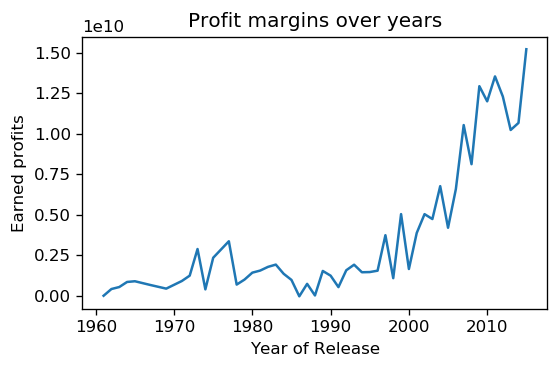

Maximum profitable year 2015
Minimum profitable year 1986


In [38]:
maxm_value,minm_value,plt=trend('release_year','profit')
#x-axis label
plt.xlabel('Year of Release', fontsize = 10)
#y-axis label
plt.ylabel('Earned profits', fontsize = 10)
#title of the graph
plt.title('Profit margins over years')
plt.show()
print('Maximum profitable year',maxm_value)
print('Minimum profitable year',minm_value)


### The maximum and minimum profitable year was found to be 2015 and 1986 respectively. From the late 1990s there is a considerable increase in profits. While mid years of last two decades saw a considerable decrease as well.

### Research Question 2  Popularity trends over the years

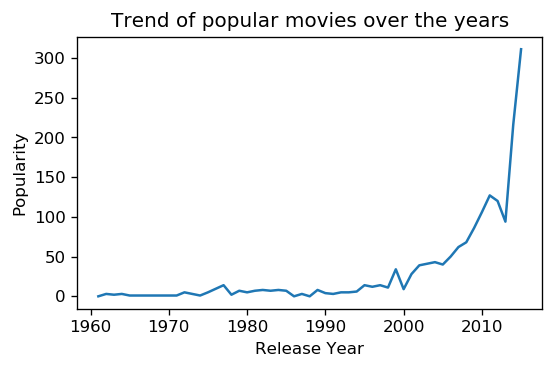

Most Popular year for movies 2015
Least Popular year for movies 1961


In [46]:
#x-axis label
maxm_value,minm_value,plt=trend('release_year','popularity')
plt.xlabel('Release Year', fontsize = 10)
#y-axis label
plt.ylabel('Popularity', fontsize = 10)
#title of the graph
plt.title('Trend of popular movies over the years')
plt.show()
print('Most Popular year for movies',maxm_value)
print('Least Popular year for movies',minm_value)

#### As per the plot, the most and the least popular year for movies was found to be 2015 and 1961. In the 21st century the trend is increasing abruptly though a slight decrease was sighted in the mid 2010s.

### Research Question 3 How the revenue, profit and budget is related to the number of movies?

In [44]:
figure = plt.figure(figsize=(10,6),dpi=150)

<Figure size 1500x900 with 0 Axes>

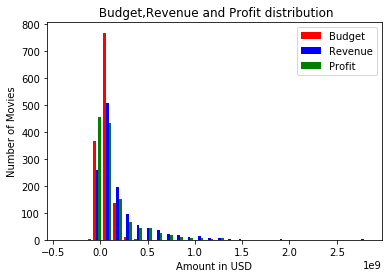

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.hist([
        df['budget_adj'],df['revenue_adj'],df['profit']
        ], 
         stacked=False, color = ['r','b','g'],
         bins = 30,label = ['Budget','Revenue', 'Profit'])
###Labeling the graph : x-axis,y-axis and Title
plt.xlabel('Amount in USD')
plt.ylabel('Number of Movies')
plt.title(' Budget,Revenue and Profit distribution')
### Adding legend 
plt.legend()

#### From the histogram plot, the budget have a sharp relation with the number of movies. Both budget and revenue are related.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

####  In conclusion, the analysis showed the most and the least profitable years. Also, the trends of movies(over the years) in terms the most and the least popular are depicted. The budget, price and revenue with respect to number of movies were addressed showing a less clear picture in some aspects. This might be due to non-consistent values or there might be inaccuracy of information.
